### Importing Libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_recall_curve, precision_score, accuracy_score
from sklearn.metrics import recall_score, classification_report, f1_score, roc_curve, auc


import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

### Importing Data

In [2]:
data = pd.read_csv('Project_ADS.csv')

In [3]:
#copying data 
df=data.copy()

#displaying first five rows
df.head()

,CUSTOMER_ID,HISTORIC_VISITS,HISTORIC_SALES,STD_SALESAMOUNT,VARIATION_SALESAMOUNT,MAX_SALESAMOUNT,MIN_SALESAMOUNT,W1_HISTORIC_VISITS,W2_HISTORIC_VISITS,W3_HISTORIC_VISITS,...,W4_MIN_SALESAMOUNT,W5_MIN_SALESAMOUNT,W1_MAX_SALESAMOUNT,W2_MAX_SALESAMOUNT,W3_MAX_SALESAMOUNT,W4_MAX_SALESAMOUNT,W5_MAX_SALESAMOUNT,CHURN,FIRST_VISIT_DAY,LAST_VISIT_DAY
0,488,1.0,171.20,0.000000,0.000000,171.20,171.20,0.00,0.00,171.2,...,0.00000,0.0,0.0000,0.000000,0.00,0.00,0.0,0,16,16
1,5194,1.0,599.20,0.000000,0.000000,599.20,599.20,0.00,599.20,0.0,...,0.00000,0.0,0.0000,0.000000,0.00,0.00,0.0,0,10,10
2,5398,2.0,102.72,0.000000,0.000000,51.36,51.36,0.00,51.36,0.0,...,0.00000,0.0,0.0000,0.000000,0.00,0.00,0.0,1,26,12
3,6930,6.0,599.20,34.946054,1221.226667,171.20,85.60,85.60,256.80,85.6,...,0.00000,0.0,0.0000,3663.680000,0.00,0.00,0.0,1,24,4
4,7260,14.0,1968.80,52.950181,2803.721705,256.80,68.48,582.08,445.12,513.6,...,60.52834,0.0,2637.8496,390.792533,7327.36,3663.68,0.0,1,30,0


### Creating Dependant and Independant Variable

In [4]:
df.drop('CUSTOMER_ID', axis=1, inplace=True)
X = df.drop('CHURN', axis=1)
Y = df['CHURN']
print(X.shape, Y.shape)

(200000, 38) (200000,)


### Train Test Split

In [5]:
xtrain,xtest, ytrain, ytest= train_test_split(X, Y, test_size= 0.25, random_state = 5, shuffle=True, stratify=Y)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(150000, 38) (150000,)
(50000, 38) (50000,)


In [6]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=1.5, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc='best')

## Logistic Regression

In [7]:
#impoe=rting Library for Logistic regression
from sklearn.linear_model import LogisticRegression

In [8]:
#Defining instance
lg_rgr = LogisticRegression(random_state=5)

In [9]:
#traing the model
lg_rgr.fit(xtrain,ytrain)

C:\Users\ASIFIQBAL\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASIFIQBAL\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=5, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [10]:
lgr_pred = lg_rgr.predict(xtest)
lgr_pproba = lg_rgr.predict_proba(xtest)[:,1]

In [11]:
acc_lgr = accuracy_score(ytest, lgr_pred)
print("Accuracy by built-in function: {}".format(acc_lgr))

Accuracy by built-in function: 0.68838


In [12]:
pr_lgr = precision_score(ytest, lgr_pred)
print("Precision by built-in function: {}".format(pr_lgr))

Precision by built-in function: 0.7304444189690091


In [13]:
recal_lgr = recall_score(ytest, lgr_pred)
print("Recall by built-in function: {}".format(recal_lgr))

Recall by built-in function: 0.6915201504956227


In [14]:
print(classification_report(ytest, lgr_pred))

              precision    recall  f1-score   support

           0       0.64      0.68      0.66     22358
           1       0.73      0.69      0.71     27642

   micro avg       0.69      0.69      0.69     50000
   macro avg       0.69      0.69      0.69     50000
weighted avg       0.69      0.69      0.69     50000



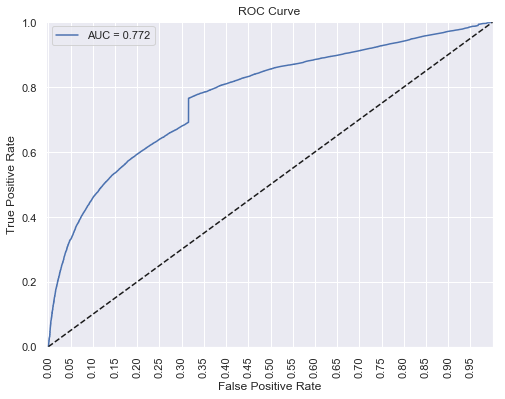

In [15]:
auc_lgr=roc_auc_score(ytest,lgr_pproba)
fpr,tpr,threshold=roc_curve(ytest,lgr_pproba)
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_lgr)

# KNN

In [16]:
#importing library
from sklearn.neighbors import KNeighborsClassifier

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
scaler.fit(xtrain)
x_train_ = scaler.transform(xtrain)
x_test_ = scaler.transform(xtest)
x_train = pd.DataFrame(data =x_train_, columns=xtrain.columns)
x_test = pd.DataFrame(data = x_test_, columns = xtest.columns)

C:\Users\ASIFIQBAL\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ASIFIQBAL\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ASIFIQBAL\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [19]:
knn = KNeighborsClassifier(n_neighbors= 20)

In [20]:
knn.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=20, p=2,
           weights='uniform')

In [21]:
knn_pred = knn.predict(xtest)
knn_pproba = knn.predict_proba(xtest)[:,1]

In [22]:
acc_knn = accuracy_score(ytest, knn_pred)
print('Accuracy by Built-in fuction :{}'.format(acc_knn))

Accuracy by Built-in fuction :0.72652


In [23]:
pr_knn = precision_score(ytest, knn_pred)
print('Precision by Built-in fuction :{}'.format(pr_knn))

Precision by Built-in fuction :0.7728338151418079


In [24]:
recal_knn = recall_score(ytest, knn_pred)
print('Recall by Built-in fuction :{}'.format(recal_knn))

Recall by Built-in fuction :0.7156862745098039


In [25]:
print(classification_report(ytest,knn_pred))

              precision    recall  f1-score   support

           0       0.68      0.74      0.71     22358
           1       0.77      0.72      0.74     27642

   micro avg       0.73      0.73      0.73     50000
   macro avg       0.73      0.73      0.73     50000
weighted avg       0.73      0.73      0.73     50000



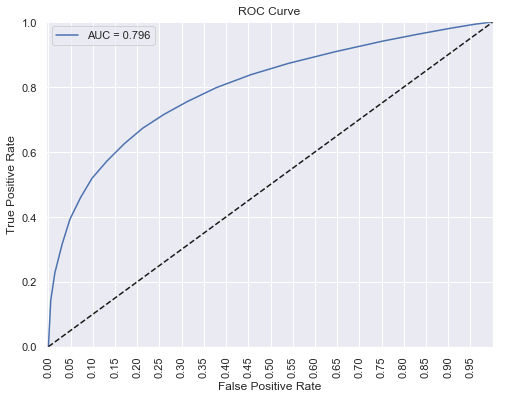

In [26]:
auc_knn=roc_auc_score(ytest,knn_pproba)
fpr,tpr,threshold=roc_curve(ytest,knn_pproba)
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_knn)

# Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
dt_clf = DecisionTreeClassifier(max_depth=10,criterion='gini',random_state=5)

In [29]:
dt_clf.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=5,
            splitter='best')

In [30]:
dt_pred = dt_clf.predict(xtest)
dt_pproba = dt_clf.predict_proba(xtest)[:,1]

In [31]:
acc_dt = accuracy_score(ytest, dt_pred)
print('Accuracy by Built-in fuction :{}'.format(acc_dt))

Accuracy by Built-in fuction :0.73976


In [32]:
pr_dt =precision_score(ytest, dt_pred)
print('Precision by Built-in fuction :{}'.format(pr_dt))

Precision by Built-in fuction :0.7878561309617503


In [33]:
recall_dt = recall_score(ytest, dt_pred)
print('Recall by Built-in fuction :{}'.format(recall_dt))

Recall by Built-in fuction :0.7242963606106649


In [34]:
print(classification_report(ytest, dt_pred))

              precision    recall  f1-score   support

           0       0.69      0.76      0.72     22358
           1       0.79      0.72      0.75     27642

   micro avg       0.74      0.74      0.74     50000
   macro avg       0.74      0.74      0.74     50000
weighted avg       0.74      0.74      0.74     50000



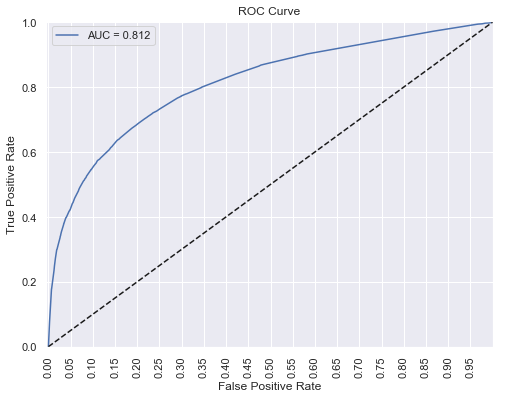

In [35]:
auc_dt=roc_auc_score(ytest,dt_pproba)
fpr,tpr,threshold=roc_curve(ytest,dt_pproba)
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_dt)

# Random Forrest

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rf_clf = RandomForestClassifier(max_depth=10,random_state=5, criterion='gini')

In [38]:
rf_clf.fit(xtrain, ytrain)

C:\Users\ASIFIQBAL\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=5, verbose=0, warm_start=False)

In [39]:
rf_pred = rf_clf.predict(xtest)
rf_pproba = rf_clf.predict_proba(xtest)[:,1]

In [40]:
acc_rf = accuracy_score(ytest, rf_pred)
print('Accuracy by Built-in Fuction :{}'.format(acc_rf))

Accuracy by Built-in Fuction :0.74308


In [41]:
pr_rf = precision_score(ytest, rf_pred)
print('Precision by Built-in Fuction :{}'.format(pr_rf))

Precision by Built-in Fuction :0.7882861819032032


In [42]:
recal_rf =recall_score(ytest, rf_pred)
print('Recall by Built-in Fuction :{}'.format(recal_rf))

Recall by Built-in Fuction :0.7318211417408291


In [43]:
print(classification_report(ytest, rf_pred))

              precision    recall  f1-score   support

           0       0.70      0.76      0.72     22358
           1       0.79      0.73      0.76     27642

   micro avg       0.74      0.74      0.74     50000
   macro avg       0.74      0.74      0.74     50000
weighted avg       0.75      0.74      0.74     50000



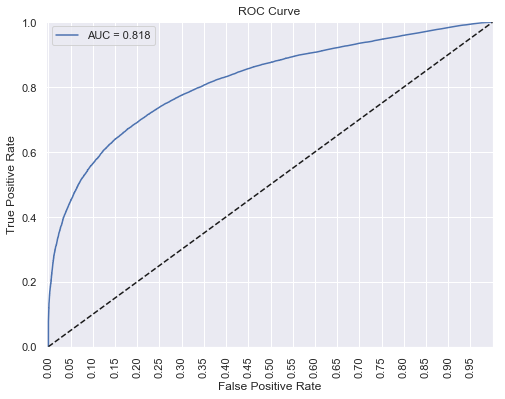

In [44]:
auc_rf=roc_auc_score(ytest,rf_pproba)
fpr,tpr,threshold=roc_curve(ytest,rf_pproba)
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_rf)

# XG Boost

In [45]:
import xgboost as xgb

In [46]:
xgb_clf = xgb.XGBClassifier(seed=5,nthread=1,random_state=5)

In [47]:
xgb_clf.fit(xtrain, ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=1, objective='binary:logistic', random_state=5,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=5, silent=True,
       subsample=1)

In [48]:
xgb_pred = xgb_clf.predict(xtest)
xgb_pproba = xgb_clf.predict_proba(xtest)[:,1]

In [49]:
acc_xgb = accuracy_score(ytest, xgb_pred)
print('Accuracy by built in Function :{}' .format(acc_xgb))

Accuracy by built in Function :0.7438


In [50]:
pr_xgb = precision_score(ytest, xgb_pred)
print('Precision by built in Function :{}' .format(pr_xgb))

Precision by built in Function :0.7945428548733021


In [51]:
recal_xgb = recall_score(ytest, xgb_pred)
print('Recall by built in Function :{}' .format(recal_xgb))

Recall by built in Function :0.72371753129296


In [52]:
print(classification_report(ytest, xgb_pred))

              precision    recall  f1-score   support

           0       0.69      0.77      0.73     22358
           1       0.79      0.72      0.76     27642

   micro avg       0.74      0.74      0.74     50000
   macro avg       0.74      0.75      0.74     50000
weighted avg       0.75      0.74      0.74     50000



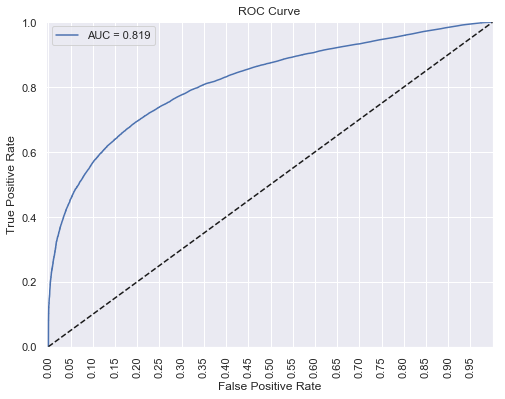

In [53]:
auc_xgb=roc_auc_score(ytest,xgb_pproba)
fpr,tpr,threshold=roc_curve(ytest,xgb_pproba)
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_xgb)

### Model Comparison

In [54]:
comp_dx= {'Algorithms':['Logistics Regression', 'KNeigbours Classifier','Decision Tree Classifier', 'Random Forrest Classifier', 'XGBoost Classifier'],
         'Accuracy':[acc_lgr,acc_knn, acc_dt,acc_rf, acc_xgb],'Precision':[pr_lgr,pr_knn,pr_dt,pr_rf,pr_xgb],
         'Recall':[recal_lgr,recal_knn,recall_dt,recal_rf,recal_xgb]}

In [55]:
model_comp = pd.DataFrame(comp_dx)
model_comp

,Algorithms,Accuracy,Precision,Recall
0,Logistics Regression,0.68838,0.730444,0.691520
1,KNeigbours Classifier,0.72652,0.772834,0.715686
2,Decision Tree Classifier,0.73976,0.787856,0.724296
3,Random Forrest Classifier,0.74308,0.788286,0.731821
4,XGBoost Classifier,0.74380,0.794543,0.723718


## Tunning Random Forrest

In [ ]:
#importing randomized search cv
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid1 = {"n_estimators" : [9, 18, 27, 36, 45, 54, 63],
           "max_depth" : [1, 5, 10, 15, 20, 25, 30],
           "min_samples_leaf" : [1, 2, 4, 6, 8, 10]}

RF = RandomForestClassifier(random_state=25)
# Instantiate the GridSearchCV object: logreg_cv
RF_cv1 = GridSearchCV(RF, param_grid1, cv=3,scoring='recall',n_jobs=4)

# Fit it to the data
RF_cv1.fit(xtrain,ytrain)

#RF_cv1.cv_results_, 
RF_cv1.best_params_, RF_cv1.best_score_

In [ ]:
param_grid2 = {"n_estimators" : [36,39,42,45,48,51,54],
           "max_depth" : [15,16,17,18,19,20,21,22,23,24,25],
           "min_samples_leaf" : [1,2,3,4]}

RF = RandomForestClassifier(random_state=25)
# Instantiate the GridSearchCV object: logreg_cv
RF_cv2 = GridSearchCV(RF, param_grid2, cv=3,scoring='recall',n_jobs=4)

# Fit it to the data
RF_cv2.fit(xtrain,ytrain)

#RF_cv2.grid_scores_, 
RF_cv2.best_params_, RF_cv2.best_score_

In [ ]:
RF_tuned = RF_cv2.best_estimator_

In [ ]:
RF_tuned.fit(xtrain, ytrain)

In [ ]:
rf_pred_t = RF_tuned.predict(xtest)
rf_pred_prb_t=RF_tuned.predict_proba(xtest)[:,1]

In [ ]:
accuracy_rf_t = accuracy_score(ytest,rf_pred_t)
print("Accuracy after tuning: {}".format(accuracy_rf_t))

In [ ]:
recall_rf_t=recall_score(ytest,rf_pred_t)
recall_rf_t

In [ ]:
print(classification_report(ytest,rf_pred_t))

In [ ]:
auc_rf_t=roc_auc_score(ytest,rf_pred_prb_t)
fpr,tpr,threshold=roc_curve(ytest,rf_pred_prb_t)
plot_roc_curve(fpr,tpr,label='AUC Tuned = %0.3f'% auc_rf_t)

In [ ]:
RF_dict = {"Algorithm":["Random Forest","Random Forest"],"Action":["First Run","Tuned"],
           "Accuracy":[acc_rf,accuracy_rf_t],"AUC":[auc_rf,auc_rf_t], "Recall":[recal_rf,recall_rf_t]}

In [ ]:
comparison=pd.DataFrame(RF_dict)
comparison

In [ ]:
print("Difference in Accuracy is: %0.3f"%((comparison.loc[1,'Accuracy']-comparison.loc[0,'Accuracy'])*100))
print("Difference in AUC is: %0.3f"%((comparison.loc[1,'AUC']-comparison.loc[0,'AUC'])*100))
print("Difference in Recall is: %0.3f"%((comparison.loc[1,'Recall']-comparison.loc[0,'Recall'])*100))